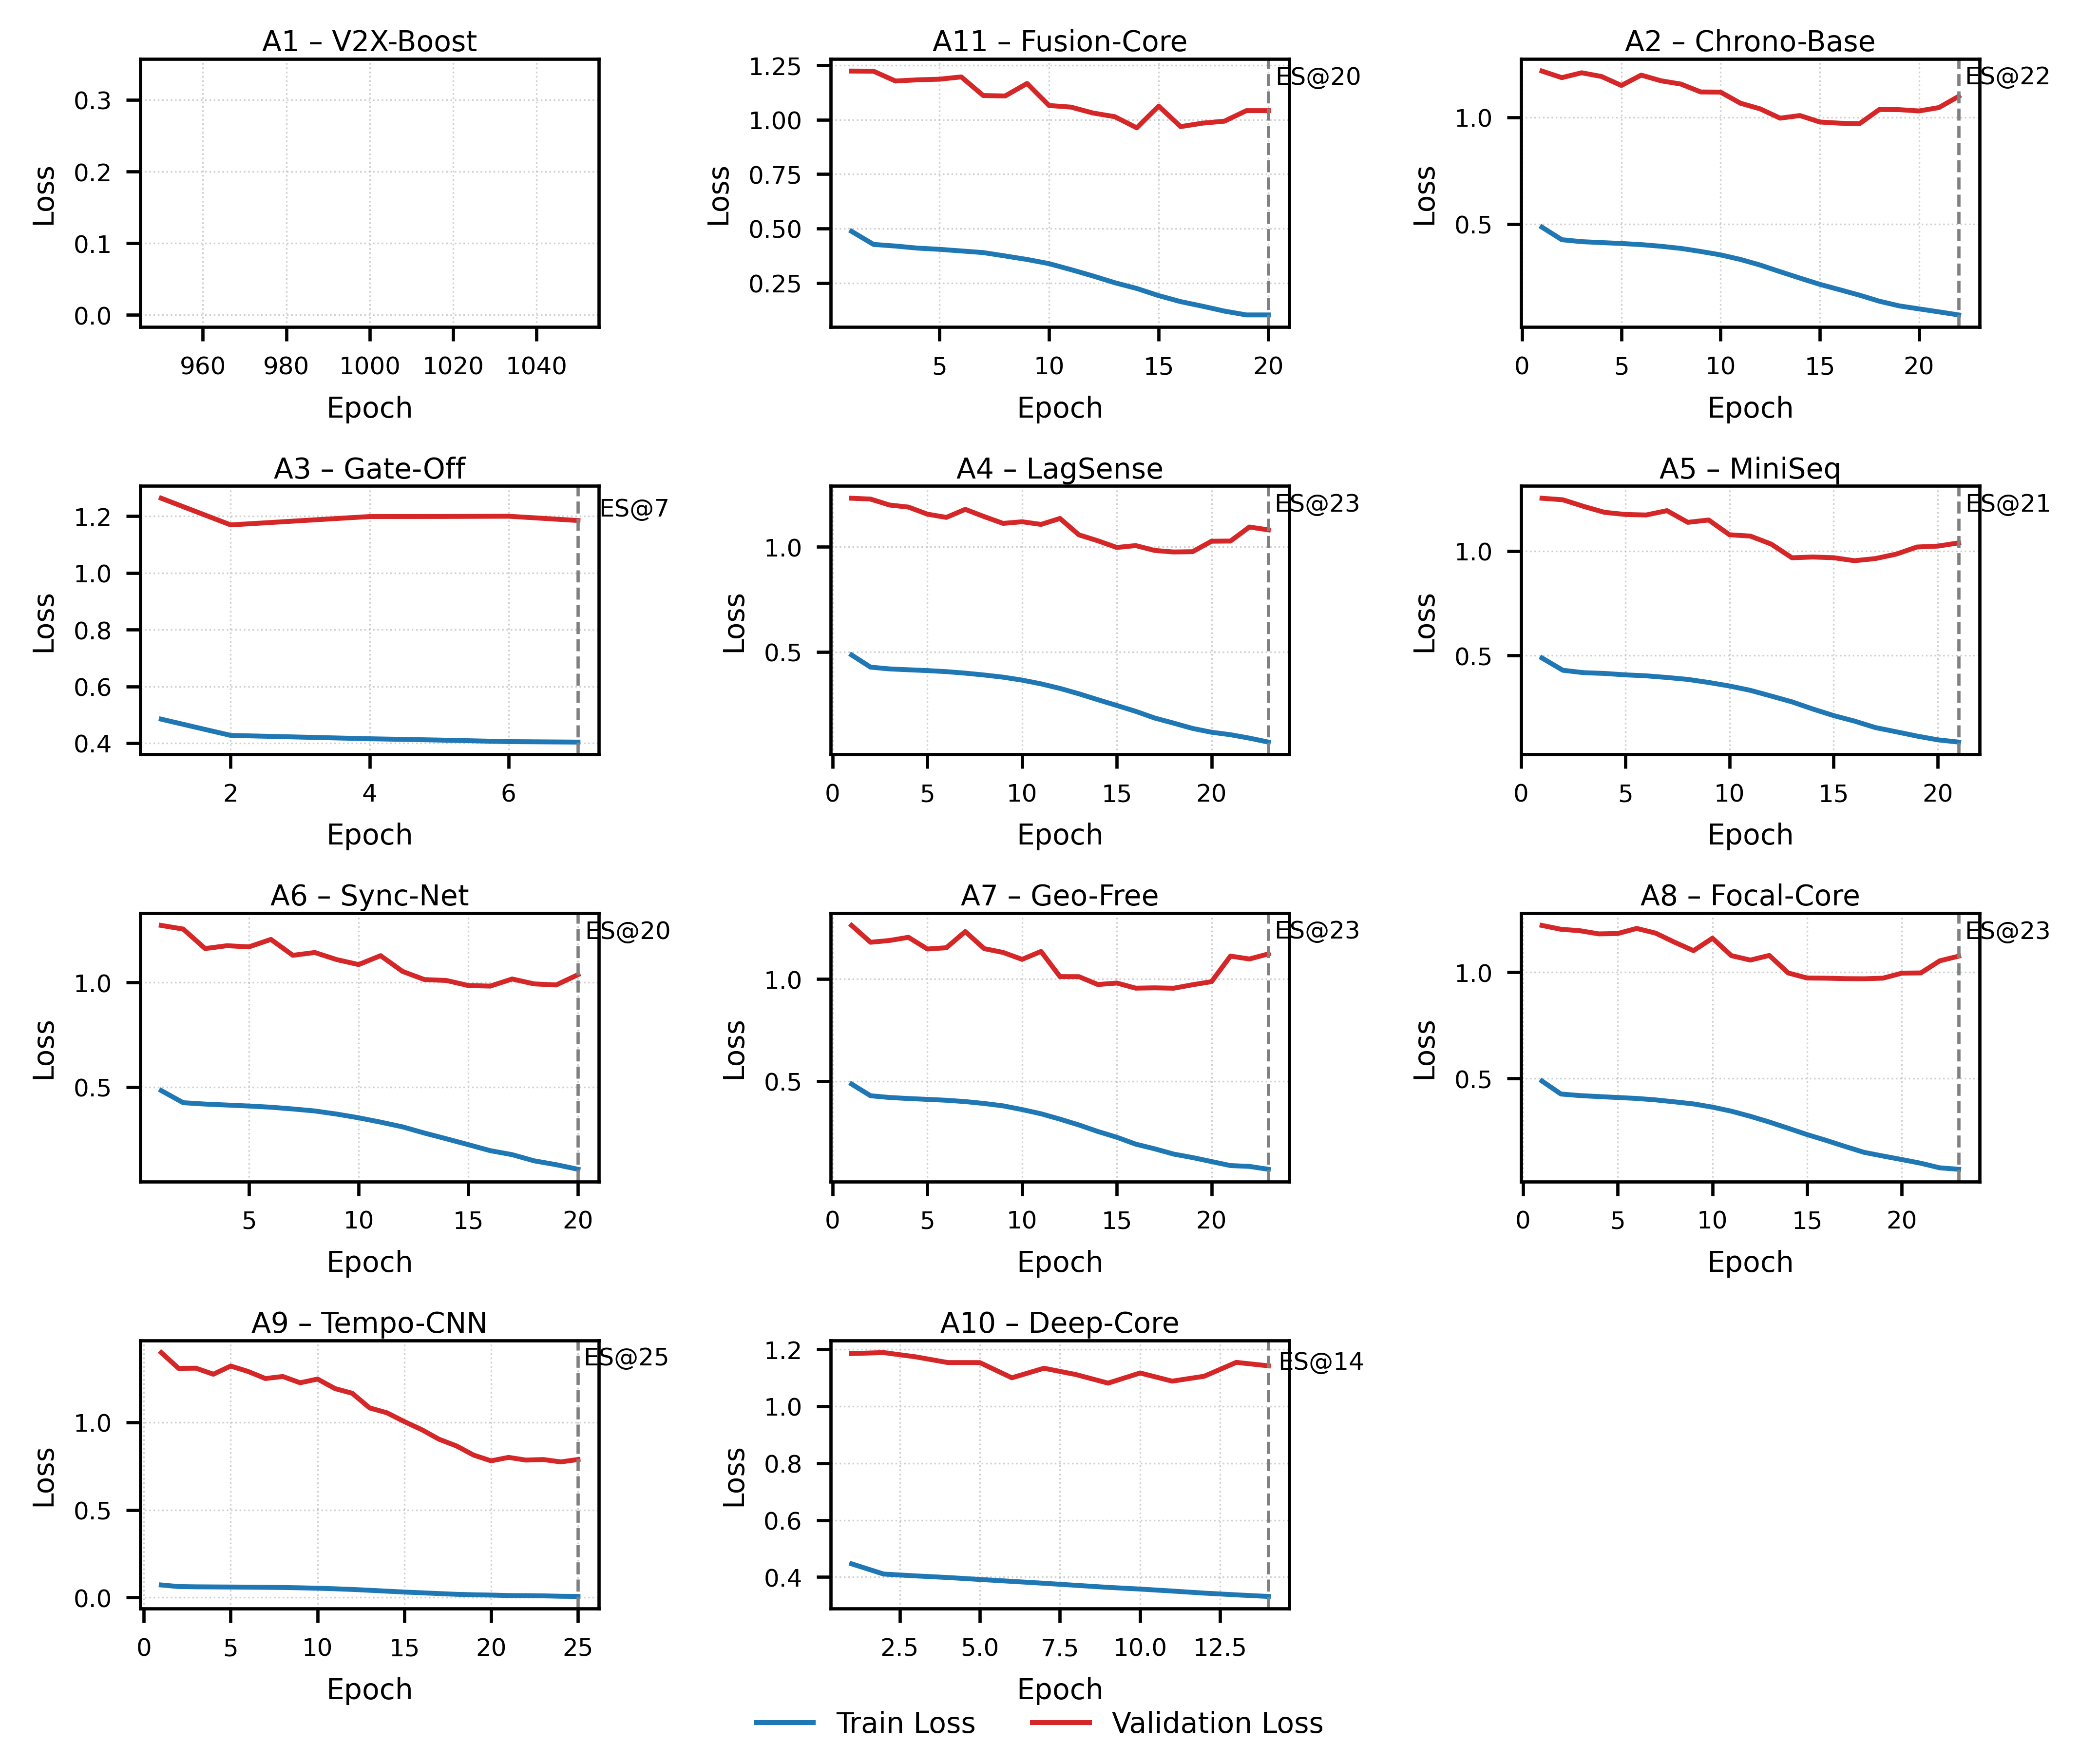

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "Arial"],
    "font.size": 7,
    "axes.titlesize": 7,
    "axes.labelsize": 7,
    "legend.fontsize": 6,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6,
    "figure.dpi": 600,
})

# ===================== Actual Loss Data ===================== #
loss_data = {
    "A1 – V2X-Boost": {
        "epochs": [1000],
        "train": [0.0],  # GBM does not use epochal loss
        "val": [0.3403],
        "early": None
    },
    "A11 – Fusion-Core": {
        "epochs": list(range(1, 21)),
        "train": [0.4868, 0.4268, 0.4193, 0.4099, 0.4043, 0.3968, 0.3893, 0.3737, 0.3576, 0.3385,
                  0.3110, 0.2819, 0.2507, 0.2243, 0.1914, 0.1638, 0.1427, 0.1201, 0.1026, 0.1026],
        "val": [1.2239, 1.2232, 1.1782, 1.1836, 1.1865, 1.1971, 1.1114, 1.1094, 1.1670, 1.0656,
                1.0582, 1.0312, 1.0141, 0.9629, 1.0628, 0.9685, 0.9845, 0.9936, 1.0419, 1.0419],
        "early": 20
    },
    "A2 – Chrono-Base": {
        "epochs": list(range(1, 23)),
        "train": [0.4860, 0.4273, 0.4181, 0.4138, 0.4096, 0.4043, 0.3966, 0.3865, 0.3723, 0.3562,
                  0.3349, 0.3085, 0.2775, 0.2475, 0.2183, 0.1931, 0.1676, 0.1393, 0.1175, 0.1033, 0.0893, 0.0750],
        "val": [1.2171, 1.1863, 1.2092, 1.1917, 1.1497, 1.1982, 1.1716, 1.1563, 1.1193, 1.1185,
                1.0666, 1.0399, 0.9966, 1.0088, 0.9786, 0.9731, 0.9707, 1.0370, 1.0364, 1.0303, 1.0461, 1.0988],
        "early": 22
    },
    "A3 – Gate-Off": {
        "epochs": [1, 2, 4, 5, 6, 7],
        "train": [0.4846, 0.4274, 0.4156, 0.4110, 0.4055, 0.4038],
        "val": [1.2635, 1.1695, 1.1990, 1.1992, 1.2001, 1.1850],
        "early": 7
    },
    "A4 – LagSense": {
        "epochs": list(range(1, 24)),
        "train": [0.4852, 0.4273, 0.4189, 0.4148, 0.4109, 0.4059, 0.3987, 0.3898, 0.3795, 0.3655,
                  0.3477, 0.3260, 0.3003, 0.2721, 0.2447, 0.2167, 0.1848, 0.1606, 0.1353, 0.1171, 0.1053, 0.0890, 0.0701],
        "val": [1.2322, 1.2282, 1.1999, 1.1901, 1.1564, 1.1409, 1.1793, 1.1447, 1.1123, 1.1202,
                1.1075, 1.1359, 1.0578, 1.0295, 0.9976, 1.0066, 0.9833, 0.9761, 0.9775, 1.0274, 1.0282, 1.0950, 1.0815],
        "early": 23
    },
    "A5 – MiniSeq": {
        "epochs": list(range(1, 22)),
        "train": [0.4887, 0.4301, 0.4185, 0.4149, 0.4081, 0.4035, 0.3956, 0.3864, 0.3718, 0.3549,
                  0.3342, 0.3069, 0.2791, 0.2449, 0.2135, 0.1872, 0.1563, 0.1362, 0.1156, 0.0977, 0.0869],
        "val": [1.2517, 1.2444, 1.2128, 1.1844, 1.1742, 1.1717, 1.1924, 1.1366, 1.1478, 1.0772,
                1.0710, 1.0328, 0.9673, 0.9710, 0.9676, 0.9533, 0.9635, 0.9847, 1.0188, 1.0231, 1.0385],
        "early": 21
    },
    "A6 – Sync-Net": {
        "epochs": list(range(1, 21)),
        "train": [0.4831, 0.4251, 0.4185, 0.4139, 0.4092, 0.4035, 0.3951, 0.3855, 0.3706, 0.3528,
                  0.3321, 0.3095, 0.2798, 0.2524, 0.2243, 0.1956, 0.1764, 0.1469, 0.1286, 0.1065],
        "val": [1.2735, 1.2561, 1.1627, 1.1764, 1.1708, 1.2065, 1.1304, 1.1439, 1.1099, 1.0861,
                1.1288, 1.0535, 1.0143, 1.0101, 0.9858, 0.9831, 1.0171, 0.9937, 0.9884, 1.0377],
        "early": 20
    },
    "A7 – Geo-Free": {
        "epochs": list(range(1, 24)),
        "train": [0.4852, 0.4280, 0.4194, 0.4144, 0.4102, 0.4059, 0.3993, 0.3900, 0.3784, 0.3602,
                  0.3396, 0.3133, 0.2847, 0.2527, 0.2244, 0.1906, 0.1677, 0.1419, 0.1248, 0.1052, 0.0855, 0.0814, 0.0674],
        "val": [1.2633, 1.1807, 1.1894, 1.2050, 1.1476, 1.1538, 1.2330, 1.1494, 1.1307, 1.0968,
                1.1356, 1.0123, 1.0120, 0.9734, 0.9807, 0.9556, 0.9572, 0.9553, 0.9723, 0.9875, 1.1129, 1.0986, 1.1235],
        "early": 23
    },
    "A8 – Focal-Core": {
        "epochs": list(range(1, 24)),
        "train": [0.4882, 0.4271, 0.4197, 0.4150, 0.4106, 0.4063, 0.3994, 0.3902, 0.3804, 0.3653,
                  0.3462, 0.3221, 0.2952, 0.2658, 0.2359, 0.2088, 0.1801, 0.1524, 0.1350, 0.1183, 0.1010, 0.0794, 0.0726],
        "val": [1.2212, 1.2030, 1.1963, 1.1813, 1.1830, 1.2070, 1.1849, 1.1420, 1.1023, 1.1610,
                1.0787, 1.0580, 1.0798, 0.9971, 0.9734, 0.9726, 0.9705, 0.9699, 0.9727, 0.9964, 0.9974, 1.0545, 1.0764],
        "early": 23
    },
    "A9 – Tempo-CNN": {
        "epochs": list(range(1, 26)),
        "train": [0.0715, 0.0625, 0.0610, 0.0604, 0.0598, 0.0591, 0.0582, 0.0572, 0.0553, 0.0530,
                  0.0498, 0.0460, 0.0413, 0.0362, 0.0312, 0.0269, 0.0225, 0.0183, 0.0157, 0.0139, 0.0111, 0.0107, 0.0096, 0.0072, 0.0061],
        "val": [1.3975, 1.3075, 1.3085, 1.2740, 1.3207, 1.2899, 1.2494, 1.2611, 1.2252, 1.2465,
                1.1924, 1.1653, 1.0818, 1.0539, 1.0037, 0.9578, 0.9029, 0.8650, 0.8122, 0.7798, 0.7995, 0.7842, 0.7873, 0.7738, 0.7872],
        "early": 25
    },
    "A10 – Deep-Core": {
        "epochs": list(range(1, 15)),
        "train": [0.4464, 0.4105, 0.4040, 0.3983, 0.3915, 0.3848, 0.3781, 0.3709, 0.3637, 0.3577, 0.3508, 0.3435, 0.3374, 0.3318],
        "val": [1.1853, 1.1887, 1.1737, 1.1537, 1.1535, 1.1001, 1.1337, 1.1114, 1.0814, 1.1170, 1.0883, 1.1056, 1.1543, 1.1422],
        "early": 14
    },
}

# ===================== Plotting ===================== #
fig, axes = plt.subplots(4, 3, figsize=(7.2, 6.0))
axes = axes.flatten()

for i, (name, d) in enumerate(loss_data.items()):
    ax = axes[i]
    ax.plot(d["epochs"], d["train"], label="Train Loss", lw=1.2, color="#1f77b4")
    ax.plot(d["epochs"], d["val"], label="Val Loss", lw=1.2, color="#d62728")
    if d["early"]:
        ax.axvline(d["early"], color="gray", ls="--", lw=0.8)
        ax.text(d["early"]+0.3, max(d["val"])*0.95, f"ES@{d['early']}", fontsize=6, color="black")
    ax.set_title(name, pad=2)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.grid(ls=":", lw=0.4, alpha=0.6)

# Remove empty last subplot if <12 models
for j in range(len(loss_data), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout(pad=1.2)
fig.legend(["Train Loss", "Validation Loss"], loc="lower center", ncol=2, fontsize=7, frameon=False)
plt.subplots_adjust(bottom=0.08)
plt.show()


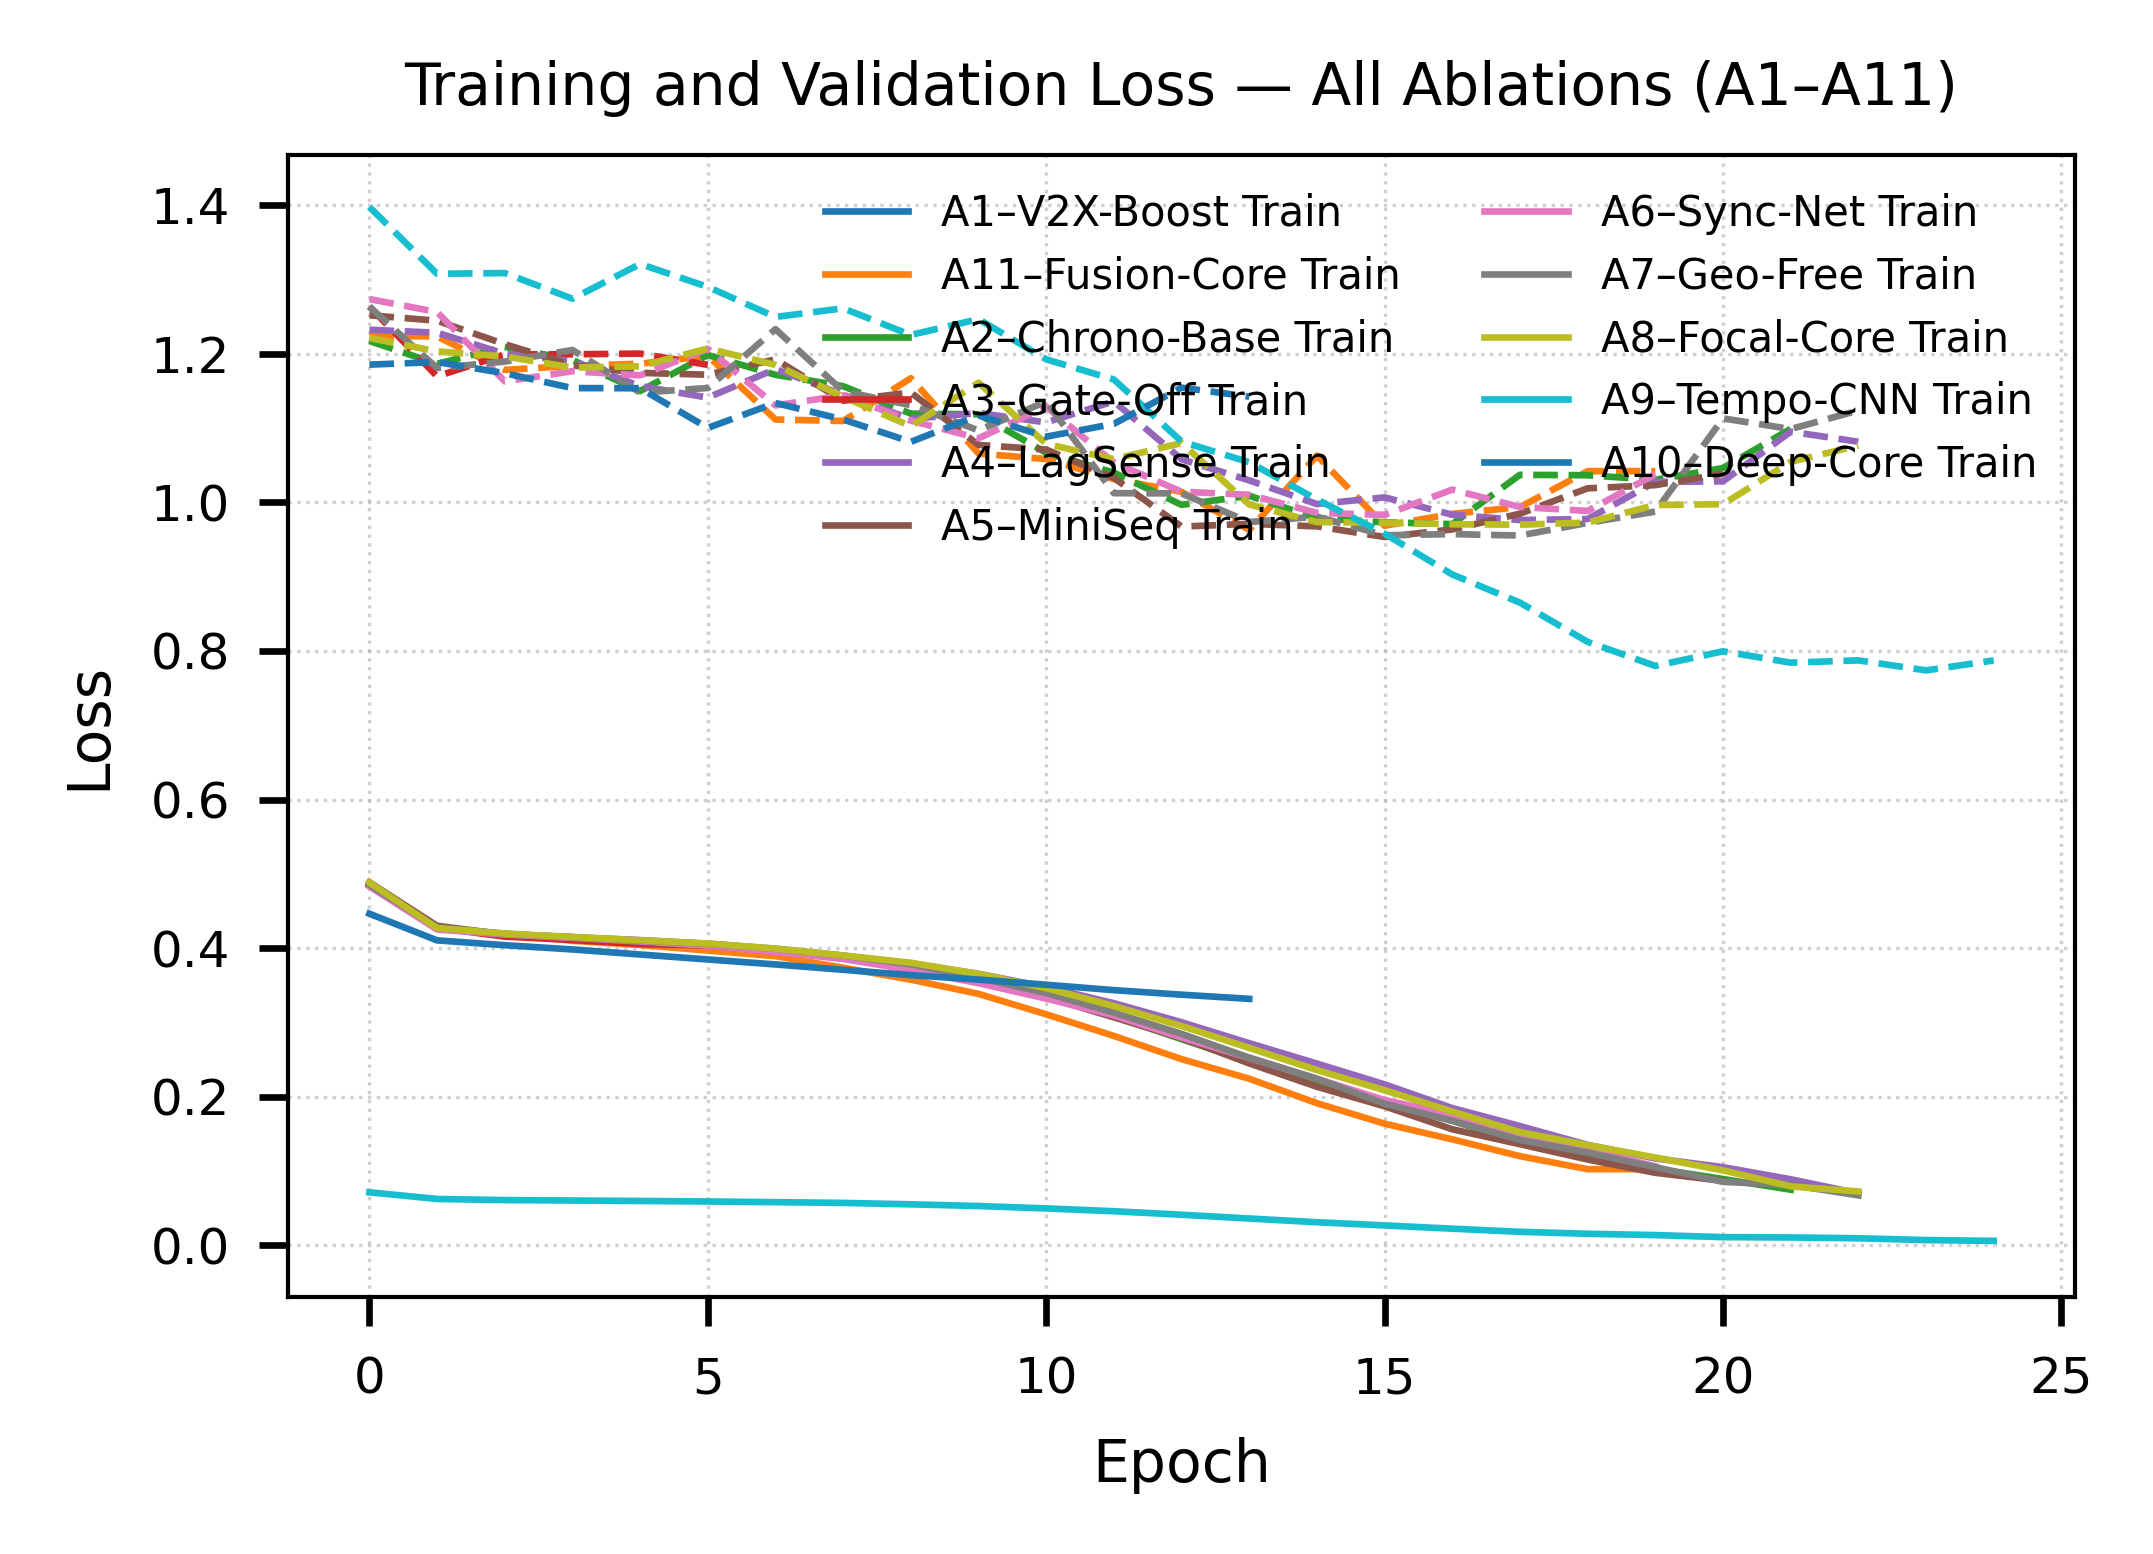

In [2]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "Arial"],
    "font.size": 7,
    "axes.titlesize": 7,
    "axes.labelsize": 7,
    "legend.fontsize": 6,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6,
    "figure.dpi": 600,
    "axes.linewidth": 0.5,
})

# --- Example structure: each model’s (train, val) pair ---
loss_curves = {
    "A1–V2X-Boost": ([0], [0.3403]),
    "A11–Fusion-Core": (
        [0.4868, 0.4268, 0.4193, 0.4099, 0.4043, 0.3968, 0.3893, 0.3737, 0.3576, 0.3385,
         0.3110, 0.2819, 0.2507, 0.2243, 0.1914, 0.1638, 0.1427, 0.1201, 0.1026, 0.1026],
        [1.2239, 1.2232, 1.1782, 1.1836, 1.1865, 1.1971, 1.1114, 1.1094, 1.1670, 1.0656,
         1.0582, 1.0312, 1.0141, 0.9629, 1.0628, 0.9685, 0.9845, 0.9936, 1.0419, 1.0419]
    ),
    "A2–Chrono-Base": (
        [0.4860,0.4273,0.4181,0.4138,0.4096,0.4043,0.3966,0.3865,0.3723,0.3562,0.3349,0.3085,0.2775,0.2475,0.2183,0.1931,0.1676,0.1393,0.1175,0.1033,0.0893,0.0750],
        [1.2171,1.1863,1.2092,1.1917,1.1497,1.1982,1.1716,1.1563,1.1193,1.1185,1.0666,1.0399,0.9966,1.0088,0.9786,0.9731,0.9707,1.0370,1.0364,1.0303,1.0461,1.0988]
    ),
    "A3–Gate-Off": (
        [0.4846,0.4274,0.4156,0.4110,0.4055,0.4038],
        [1.2635,1.1695,1.1990,1.1992,1.2001,1.1850]
    ),
    "A4–LagSense": (
        [0.4852,0.4273,0.4189,0.4148,0.4109,0.4059,0.3987,0.3898,0.3795,0.3655,0.3477,0.3260,0.3003,0.2721,0.2447,0.2167,0.1848,0.1606,0.1353,0.1171,0.1053,0.0890,0.0701],
        [1.2322,1.2282,1.1999,1.1901,1.1564,1.1409,1.1793,1.1447,1.1123,1.1202,1.1075,1.1359,1.0578,1.0295,0.9976,1.0066,0.9833,0.9761,0.9775,1.0274,1.0282,1.0950,1.0815]
    ),
    "A5–MiniSeq": (
        [0.4887,0.4301,0.4185,0.4149,0.4081,0.4035,0.3956,0.3864,0.3718,0.3549,0.3342,0.3069,0.2791,0.2449,0.2135,0.1872,0.1563,0.1362,0.1156,0.0977,0.0869],
        [1.2517,1.2444,1.2128,1.1844,1.1742,1.1717,1.1924,1.1366,1.1478,1.0772,1.0710,1.0328,0.9673,0.9710,0.9676,0.9533,0.9635,0.9847,1.0188,1.0231,1.0385]
    ),
    "A6–Sync-Net": (
        [0.4831,0.4251,0.4185,0.4139,0.4092,0.4035,0.3951,0.3855,0.3706,0.3528,0.3321,0.3095,0.2798,0.2524,0.2243,0.1956,0.1764,0.1469,0.1286,0.1065],
        [1.2735,1.2561,1.1627,1.1764,1.1708,1.2065,1.1304,1.1439,1.1099,1.0861,1.1288,1.0535,1.0143,1.0101,0.9858,0.9831,1.0171,0.9937,0.9884,1.0377]
    ),
    "A7–Geo-Free": (
        [0.4852,0.4280,0.4194,0.4144,0.4102,0.4059,0.3993,0.3900,0.3784,0.3602,0.3396,0.3133,0.2847,0.2527,0.2244,0.1906,0.1677,0.1419,0.1248,0.1052,0.0855,0.0814,0.0674],
        [1.2633,1.1807,1.1894,1.2050,1.1476,1.1538,1.2330,1.1494,1.1307,1.0968,1.1356,1.0123,1.0120,0.9734,0.9807,0.9556,0.9572,0.9553,0.9723,0.9875,1.1129,1.0986,1.1235]
    ),
    "A8–Focal-Core": (
        [0.4882,0.4271,0.4197,0.4150,0.4106,0.4063,0.3994,0.3902,0.3804,0.3653,0.3462,0.3221,0.2952,0.2658,0.2359,0.2088,0.1801,0.1524,0.1350,0.1183,0.1010,0.0794,0.0726],
        [1.2212,1.2030,1.1963,1.1813,1.1830,1.2070,1.1849,1.1420,1.1023,1.1610,1.0787,1.0580,1.0798,0.9971,0.9734,0.9726,0.9705,0.9699,0.9727,0.9964,0.9974,1.0545,1.0764]
    ),
    "A9–Tempo-CNN": (
        [0.0715,0.0625,0.0610,0.0604,0.0598,0.0591,0.0582,0.0572,0.0553,0.0530,0.0498,0.0460,0.0413,0.0362,0.0312,0.0269,0.0225,0.0183,0.0157,0.0139,0.0111,0.0107,0.0096,0.0072,0.0061],
        [1.3975,1.3075,1.3085,1.2740,1.3207,1.2899,1.2494,1.2611,1.2252,1.2465,1.1924,1.1653,1.0818,1.0539,1.0037,0.9578,0.9029,0.8650,0.8122,0.7798,0.7995,0.7842,0.7873,0.7738,0.7872]
    ),
    "A10–Deep-Core": (
        [0.4464,0.4105,0.4040,0.3983,0.3915,0.3848,0.3781,0.3709,0.3637,0.3577,0.3508,0.3435,0.3374,0.3318],
        [1.1853,1.1887,1.1737,1.1537,1.1535,1.1001,1.1337,1.1114,1.0814,1.1170,1.0883,1.1056,1.1543,1.1422]
    ),
}

colors = plt.cm.tab10.colors

plt.figure(figsize=(3.6, 2.6))  # IEEE column width
for i, (name, (train, val)) in enumerate(loss_curves.items()):
    color = colors[i % len(colors)]
    plt.plot(train, label=f"{name} Train", lw=0.8, color=color)
    plt.plot(val, ls="--", lw=0.8, color=color)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss — All Ablations (A1–A11)")
plt.grid(ls=":", lw=0.4, alpha=0.6)
plt.legend(frameon=False, ncol=2, fontsize=5, loc="upper right")
plt.tight_layout()
plt.savefig("fig7b_all_losses.png", dpi=600, bbox_inches="tight")
plt.show()



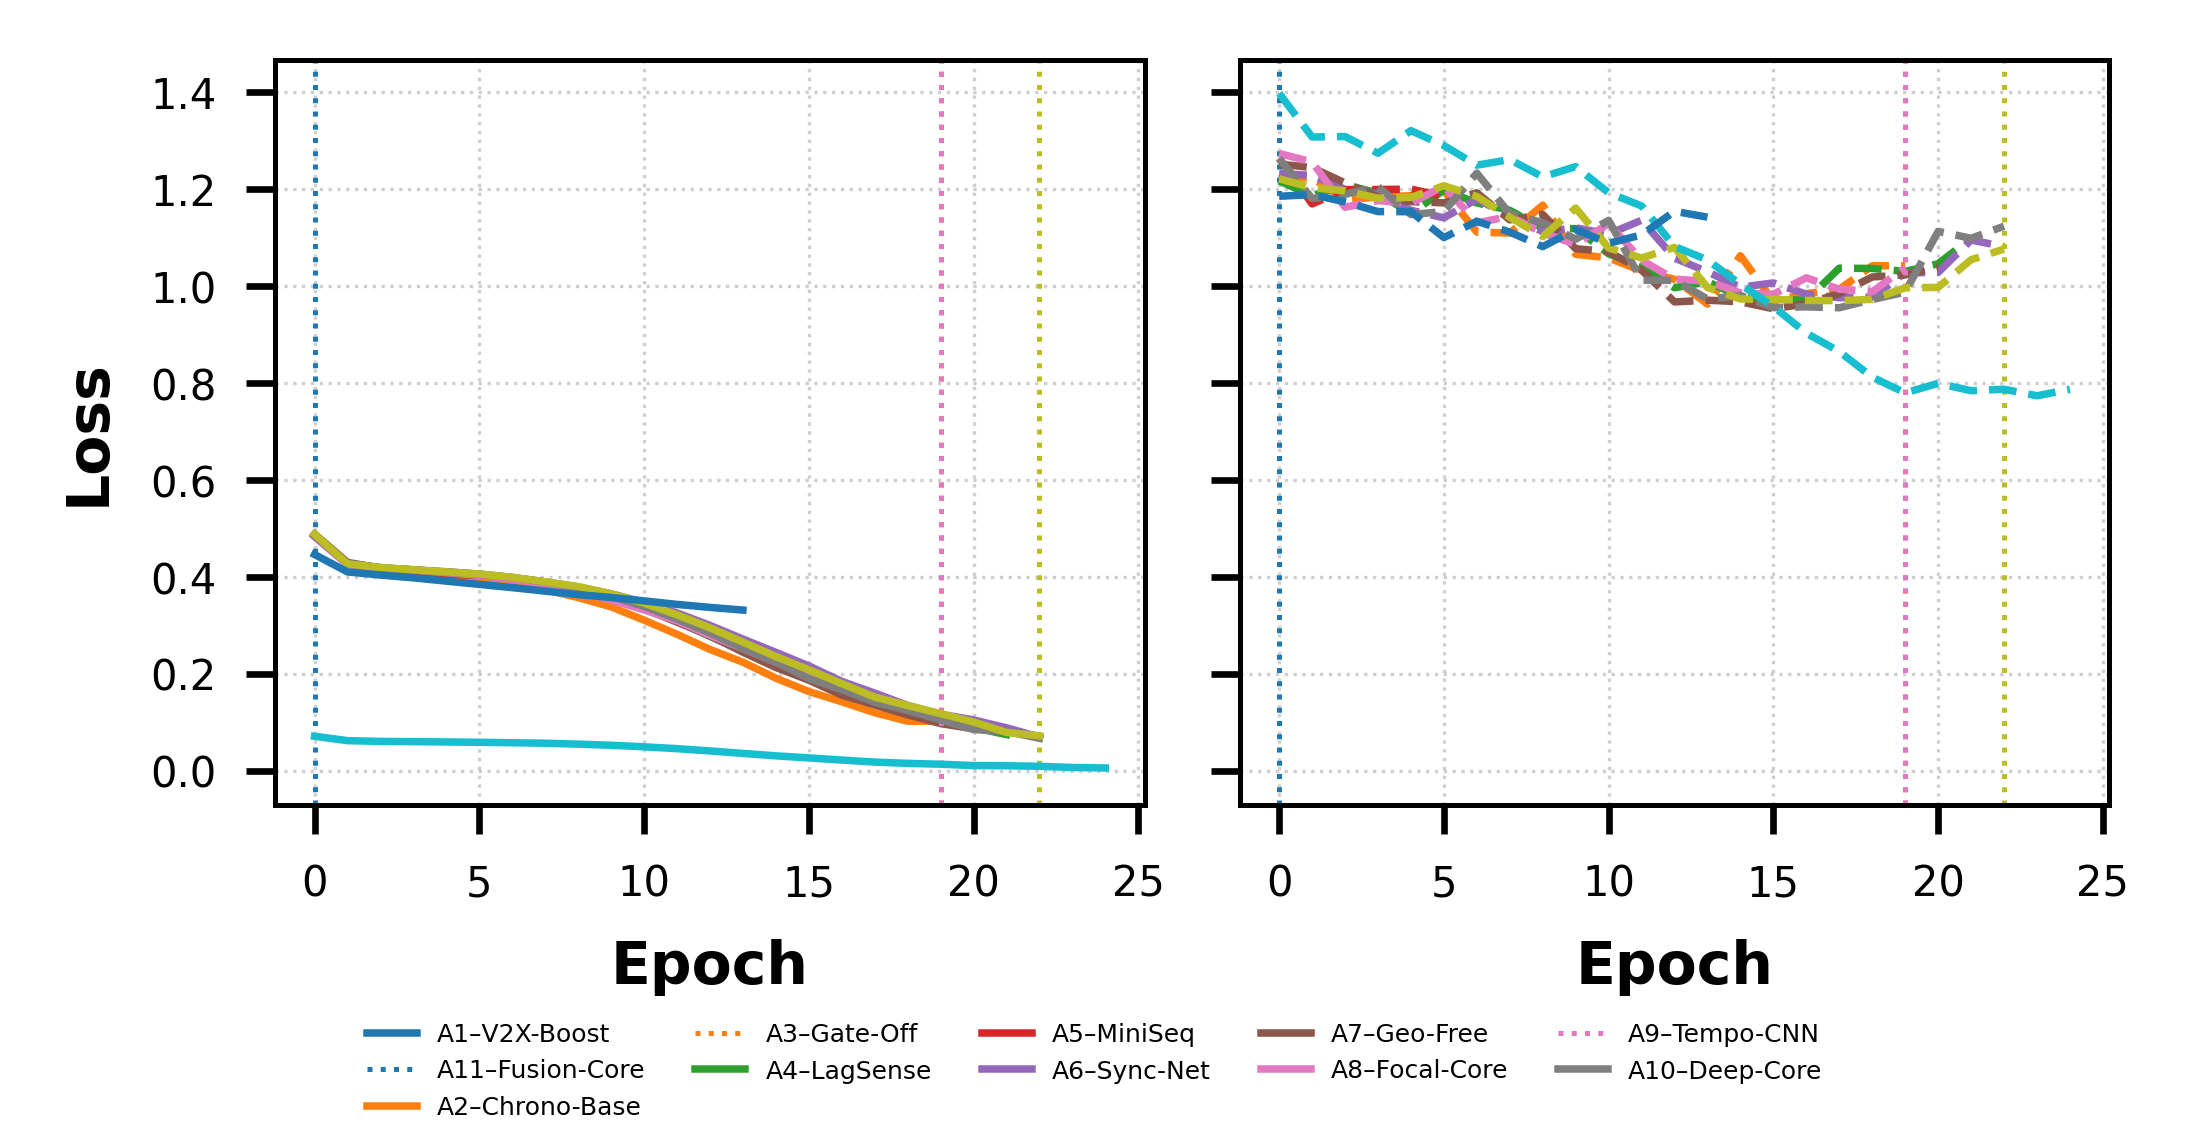

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "Arial"],
    "font.size": 5,
    "axes.labelweight": "bold",
    "axes.linewidth": 0.6,
    "xtick.labelsize": 5,
    "ytick.labelsize": 5,
    "legend.fontsize": 2,
    "figure.dpi": 600,
})


# === Embedded loss data ===
loss_curves = {
    "A1–V2X-Boost": ([0], [0.3403]),
    "A11–Fusion-Core": (
        [0.4868,0.4268,0.4193,0.4099,0.4043,0.3968,0.3893,0.3737,0.3576,0.3385,
         0.3110,0.2819,0.2507,0.2243,0.1914,0.1638,0.1427,0.1201,0.1026,0.1026],
        [1.2239,1.2232,1.1782,1.1836,1.1865,1.1971,1.1114,1.1094,1.1670,1.0656,
         1.0582,1.0312,1.0141,0.9629,1.0628,0.9685,0.9845,0.9936,1.0419,1.0419]
    ),
    "A2–Chrono-Base": (
        [0.4860,0.4273,0.4181,0.4138,0.4096,0.4043,0.3966,0.3865,0.3723,0.3562,
         0.3349,0.3085,0.2775,0.2475,0.2183,0.1931,0.1676,0.1393,0.1175,0.1033,
         0.0893,0.0750],
        [1.2171,1.1863,1.2092,1.1917,1.1497,1.1982,1.1716,1.1563,1.1193,1.1185,
         1.0666,1.0399,0.9966,1.0088,0.9786,0.9731,0.9707,1.0370,1.0364,1.0303,
         1.0461,1.0988]
    ),
    "A3–Gate-Off": (
        [0.4846,0.4274,0.4156,0.4110,0.4055,0.4038],
        [1.2635,1.1695,1.1990,1.1992,1.2001,1.1850]
    ),
    "A4–LagSense": (
        [0.4852,0.4273,0.4189,0.4148,0.4109,0.4059,0.3987,0.3898,0.3795,0.3655,
         0.3477,0.3260,0.3003,0.2721,0.2447,0.2167,0.1848,0.1606,0.1353,0.1171,
         0.1053,0.0890,0.0701],
        [1.2322,1.2282,1.1999,1.1901,1.1564,1.1409,1.1793,1.1447,1.1123,1.1202,
         1.1075,1.1359,1.0578,1.0295,0.9976,1.0066,0.9833,0.9761,0.9775,1.0274,
         1.0282,1.0950,1.0815]
    ),
    "A5–MiniSeq": (
        [0.4887,0.4301,0.4185,0.4149,0.4081,0.4035,0.3956,0.3864,0.3718,0.3549,
         0.3342,0.3069,0.2791,0.2449,0.2135,0.1872,0.1563,0.1362,0.1156,0.0977,
         0.0869],
        [1.2517,1.2444,1.2128,1.1844,1.1742,1.1717,1.1924,1.1366,1.1478,1.0772,
         1.0710,1.0328,0.9673,0.9710,0.9676,0.9533,0.9635,0.9847,1.0188,1.0231,
         1.0385]
    ),
    "A6–Sync-Net": (
        [0.4831,0.4251,0.4185,0.4139,0.4092,0.4035,0.3951,0.3855,0.3706,0.3528,
         0.3321,0.3095,0.2798,0.2524,0.2243,0.1956,0.1764,0.1469,0.1286,0.1065],
        [1.2735,1.2561,1.1627,1.1764,1.1708,1.2065,1.1304,1.1439,1.1099,1.0861,
         1.1288,1.0535,1.0143,1.0101,0.9858,0.9831,1.0171,0.9937,0.9884,1.0377]
    ),
    "A7–Geo-Free": (
        [0.4852,0.4280,0.4194,0.4144,0.4102,0.4059,0.3993,0.3900,0.3784,0.3602,
         0.3396,0.3133,0.2847,0.2527,0.2244,0.1906,0.1677,0.1419,0.1248,0.1052,
         0.0855,0.0814,0.0674],
        [1.2633,1.1807,1.1894,1.2050,1.1476,1.1538,1.2330,1.1494,1.1307,1.0968,
         1.1356,1.0123,1.0120,0.9734,0.9807,0.9556,0.9572,0.9553,0.9723,0.9875,
         1.1129,1.0986,1.1235]
    ),
    "A8–Focal-Core": (
        [0.4882,0.4271,0.4197,0.4150,0.4106,0.4063,0.3994,0.3902,0.3804,0.3653,
         0.3462,0.3221,0.2952,0.2658,0.2359,0.2088,0.1801,0.1524,0.1350,0.1183,
         0.1010,0.0794,0.0726],
        [1.2212,1.2030,1.1963,1.1813,1.1830,1.2070,1.1849,1.1420,1.1023,1.1610,
         1.0787,1.0580,1.0798,0.9971,0.9734,0.9726,0.9705,0.9699,0.9727,0.9964,
         0.9974,1.0545,1.0764]
    ),
    "A9–Tempo-CNN": (
        [0.0715,0.0625,0.0610,0.0604,0.0598,0.0591,0.0582,0.0572,0.0553,0.0530,
         0.0498,0.0460,0.0413,0.0362,0.0312,0.0269,0.0225,0.0183,0.0157,0.0139,
         0.0111,0.0107,0.0096,0.0072,0.0061],
        [1.3975,1.3075,1.3085,1.2740,1.3207,1.2899,1.2494,1.2611,1.2252,1.2465,
         1.1924,1.1653,1.0818,1.0539,1.0037,0.9578,0.9029,0.8650,0.8122,0.7798,
         0.7995,0.7842,0.7873,0.7738,0.7872]
    ),
    "A10–Deep-Core": (
        [0.4464,0.4105,0.4040,0.3983,0.3915,0.3848,0.3781,0.3709,0.3637,0.3577,
         0.3508,0.3435,0.3374,0.3318],
        [1.1853,1.1887,1.1737,1.1537,1.1535,1.1001,1.1337,1.1114,1.0814,1.1170,
         1.0883,1.1056,1.1543,1.1422]
    ),
}

early_stops = {"A1–V2X-Boost": 1000, "A11–Fusion-Core": 20,
               "A8–Focal-Core": 23, "A6–Sync-Net": 20}

colors = plt.cm.tab10.colors
fig, axes = plt.subplots(1, 2, figsize=(3.6, 1.8), sharey=True)

# --- Left: Train loss ---
for i, (name, (train, val)) in enumerate(loss_curves.items()):
    color = colors[i % len(colors)]
    axes[0].plot(train, lw=0.9, color=color, label=name)
    es = early_stops.get(name)
    if es: axes[0].axvline(x=len(train)-1, color=color, ls=":", lw=0.6)

# --- Right: Val loss ---
for i, (name, (train, val)) in enumerate(loss_curves.items()):
    color = colors[i % len(colors)]
    axes[1].plot(val, lw=0.9, ls="--", color=color)
    es = early_stops.get(name)
    if es: axes[1].axvline(x=len(val)-1, color=color, ls=":", lw=0.6)

# --- Styling ---
for ax in axes:
    ax.grid(ls=":", lw=0.4, alpha=0.6)
    ax.set_xlabel("Epoch", fontweight="bold")
axes[0].set_ylabel("Loss", fontweight="bold")

# --- Legend below both subplots ---
fig.legend(loss_curves.keys(), loc="lower center",
           ncol=5, frameon=False, fontsize=3)

plt.subplots_adjust(bottom=0.22, wspace=0.15)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("fig7b_train_val_1x2_clean.png", dpi=600, bbox_inches="tight")
plt.show()


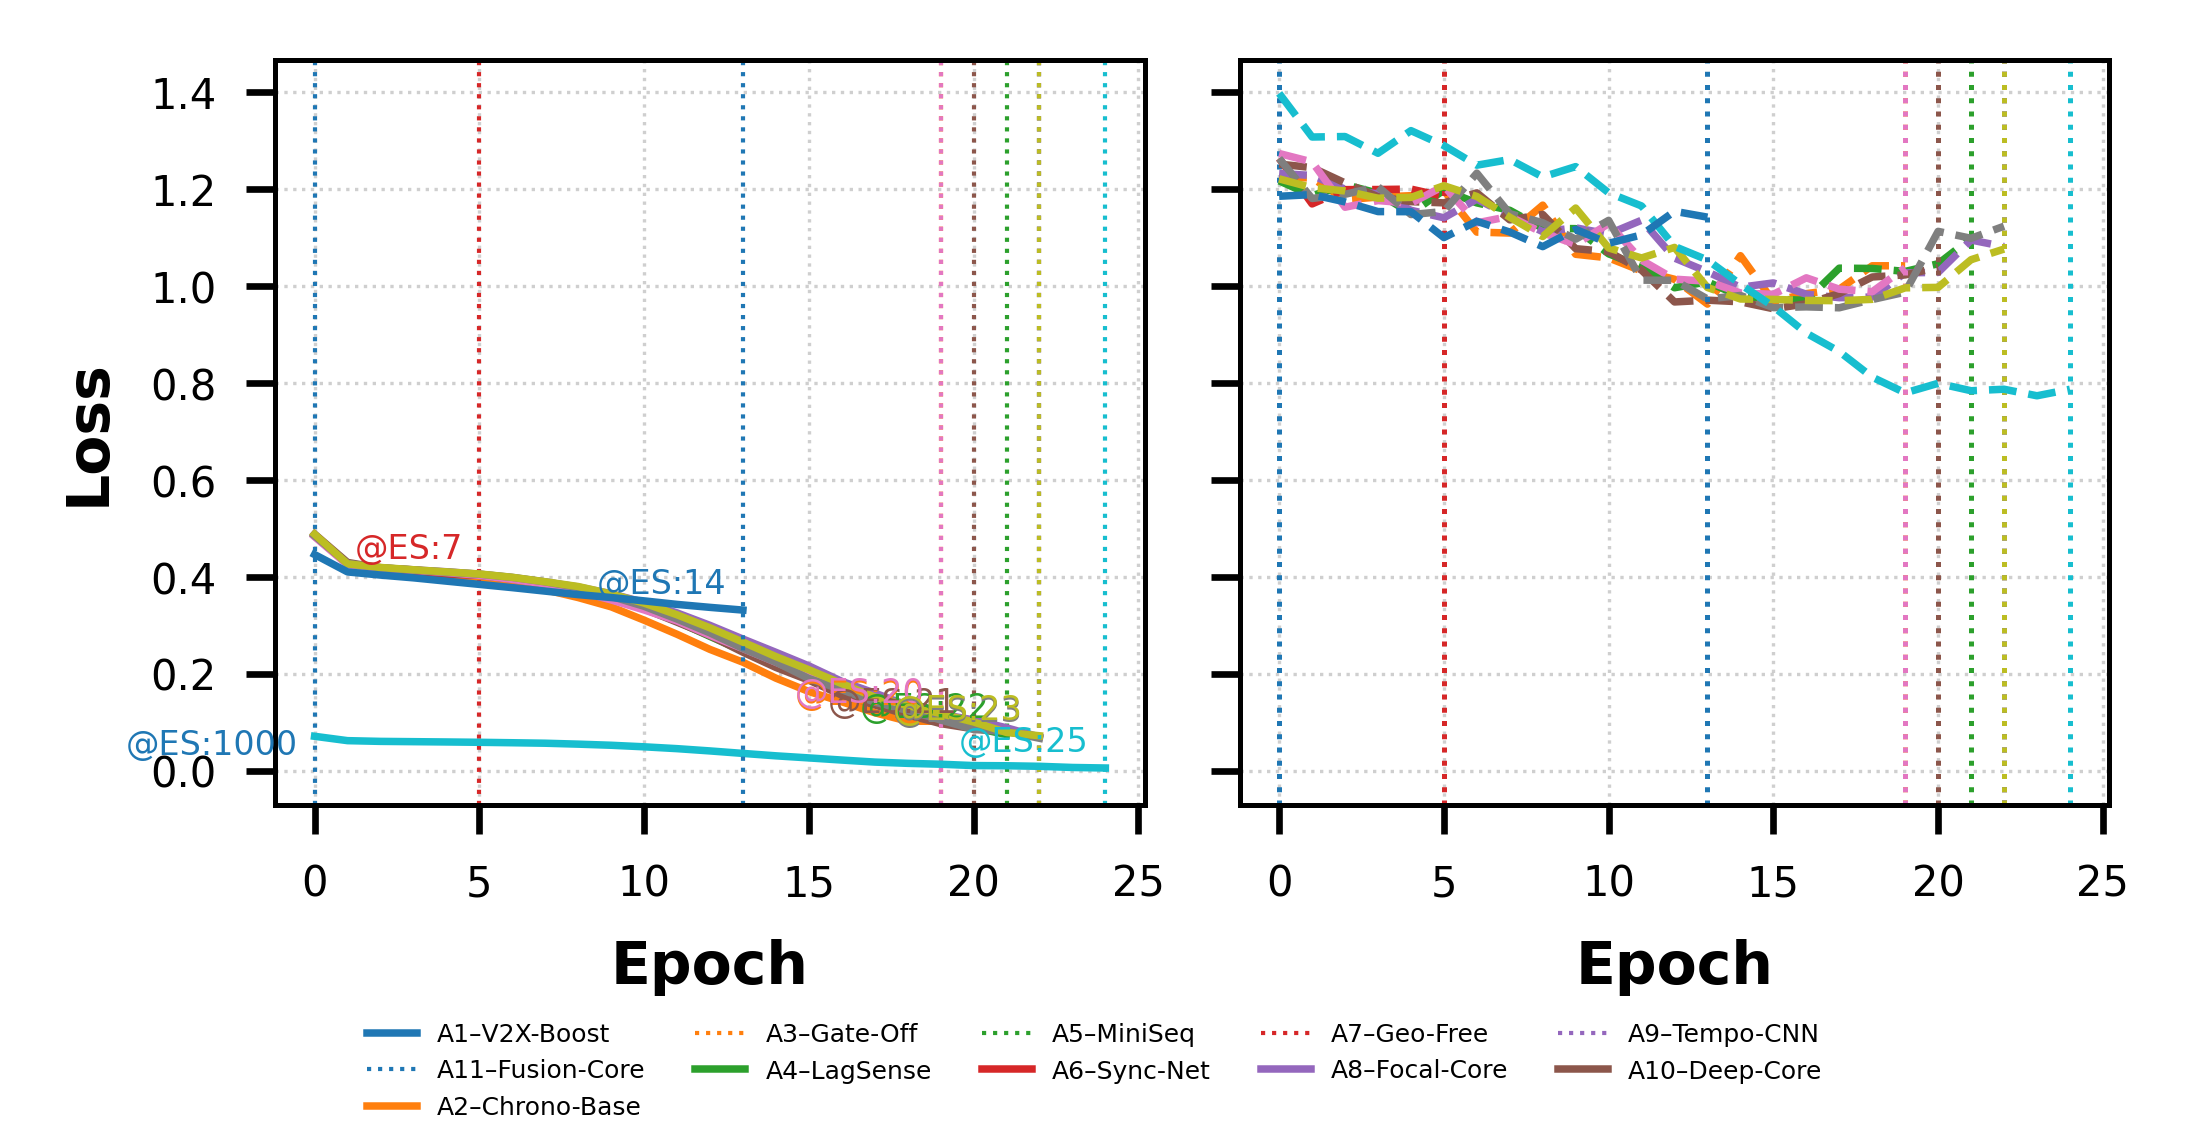

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "Arial"],
    "font.size": 5,
    "axes.labelweight": "bold",
    "axes.linewidth": 0.6,
    "xtick.labelsize": 5,
    "ytick.labelsize": 5,
    "legend.fontsize": 2,
    "figure.dpi": 600,
})


# === Embedded loss data ===
loss_curves = {
    "A1–V2X-Boost": ([0], [0.3403]),
    "A11–Fusion-Core": (
        [0.4868,0.4268,0.4193,0.4099,0.4043,0.3968,0.3893,0.3737,0.3576,0.3385,
         0.3110,0.2819,0.2507,0.2243,0.1914,0.1638,0.1427,0.1201,0.1026,0.1026],
        [1.2239,1.2232,1.1782,1.1836,1.1865,1.1971,1.1114,1.1094,1.1670,1.0656,
         1.0582,1.0312,1.0141,0.9629,1.0628,0.9685,0.9845,0.9936,1.0419,1.0419]
    ),
    "A2–Chrono-Base": (
        [0.4860,0.4273,0.4181,0.4138,0.4096,0.4043,0.3966,0.3865,0.3723,0.3562,
         0.3349,0.3085,0.2775,0.2475,0.2183,0.1931,0.1676,0.1393,0.1175,0.1033,
         0.0893,0.0750],
        [1.2171,1.1863,1.2092,1.1917,1.1497,1.1982,1.1716,1.1563,1.1193,1.1185,
         1.0666,1.0399,0.9966,1.0088,0.9786,0.9731,0.9707,1.0370,1.0364,1.0303,
         1.0461,1.0988]
    ),
    "A3–Gate-Off": (
        [0.4846,0.4274,0.4156,0.4110,0.4055,0.4038],
        [1.2635,1.1695,1.1990,1.1992,1.2001,1.1850]
    ),
    "A4–LagSense": (
        [0.4852,0.4273,0.4189,0.4148,0.4109,0.4059,0.3987,0.3898,0.3795,0.3655,
         0.3477,0.3260,0.3003,0.2721,0.2447,0.2167,0.1848,0.1606,0.1353,0.1171,
         0.1053,0.0890,0.0701],
        [1.2322,1.2282,1.1999,1.1901,1.1564,1.1409,1.1793,1.1447,1.1123,1.1202,
         1.1075,1.1359,1.0578,1.0295,0.9976,1.0066,0.9833,0.9761,0.9775,1.0274,
         1.0282,1.0950,1.0815]
    ),
    "A5–MiniSeq": (
        [0.4887,0.4301,0.4185,0.4149,0.4081,0.4035,0.3956,0.3864,0.3718,0.3549,
         0.3342,0.3069,0.2791,0.2449,0.2135,0.1872,0.1563,0.1362,0.1156,0.0977,
         0.0869],
        [1.2517,1.2444,1.2128,1.1844,1.1742,1.1717,1.1924,1.1366,1.1478,1.0772,
         1.0710,1.0328,0.9673,0.9710,0.9676,0.9533,0.9635,0.9847,1.0188,1.0231,
         1.0385]
    ),
    "A6–Sync-Net": (
        [0.4831,0.4251,0.4185,0.4139,0.4092,0.4035,0.3951,0.3855,0.3706,0.3528,
         0.3321,0.3095,0.2798,0.2524,0.2243,0.1956,0.1764,0.1469,0.1286,0.1065],
        [1.2735,1.2561,1.1627,1.1764,1.1708,1.2065,1.1304,1.1439,1.1099,1.0861,
         1.1288,1.0535,1.0143,1.0101,0.9858,0.9831,1.0171,0.9937,0.9884,1.0377]
    ),
    "A7–Geo-Free": (
        [0.4852,0.4280,0.4194,0.4144,0.4102,0.4059,0.3993,0.3900,0.3784,0.3602,
         0.3396,0.3133,0.2847,0.2527,0.2244,0.1906,0.1677,0.1419,0.1248,0.1052,
         0.0855,0.0814,0.0674],
        [1.2633,1.1807,1.1894,1.2050,1.1476,1.1538,1.2330,1.1494,1.1307,1.0968,
         1.1356,1.0123,1.0120,0.9734,0.9807,0.9556,0.9572,0.9553,0.9723,0.9875,
         1.1129,1.0986,1.1235]
    ),
    "A8–Focal-Core": (
        [0.4882,0.4271,0.4197,0.4150,0.4106,0.4063,0.3994,0.3902,0.3804,0.3653,
         0.3462,0.3221,0.2952,0.2658,0.2359,0.2088,0.1801,0.1524,0.1350,0.1183,
         0.1010,0.0794,0.0726],
        [1.2212,1.2030,1.1963,1.1813,1.1830,1.2070,1.1849,1.1420,1.1023,1.1610,
         1.0787,1.0580,1.0798,0.9971,0.9734,0.9726,0.9705,0.9699,0.9727,0.9964,
         0.9974,1.0545,1.0764]
    ),
    "A9–Tempo-CNN": (
        [0.0715,0.0625,0.0610,0.0604,0.0598,0.0591,0.0582,0.0572,0.0553,0.0530,
         0.0498,0.0460,0.0413,0.0362,0.0312,0.0269,0.0225,0.0183,0.0157,0.0139,
         0.0111,0.0107,0.0096,0.0072,0.0061],
        [1.3975,1.3075,1.3085,1.2740,1.3207,1.2899,1.2494,1.2611,1.2252,1.2465,
         1.1924,1.1653,1.0818,1.0539,1.0037,0.9578,0.9029,0.8650,0.8122,0.7798,
         0.7995,0.7842,0.7873,0.7738,0.7872]
    ),
    "A10–Deep-Core": (
        [0.4464,0.4105,0.4040,0.3983,0.3915,0.3848,0.3781,0.3709,0.3637,0.3577,
         0.3508,0.3435,0.3374,0.3318],
        [1.1853,1.1887,1.1737,1.1537,1.1535,1.1001,1.1337,1.1114,1.0814,1.1170,
         1.0883,1.1056,1.1543,1.1422]
    ),
}

early_stops = {
    "A1–V2X-Boost": 1000,
    "A11–Fusion-Core": 20,
    "A2–Chrono-Base": 22,
    "A3–Gate-Off": 7,
    "A4–LagSense": 23,
    "A5–MiniSeq": 21,
    "A6–Sync-Net": 20,
    "A7–Geo-Free": 23,
    "A8–Focal-Core": 23,
    "A9–Tempo-CNN": 25,
    "A10–Deep-Core": 14,
}

colors = plt.cm.tab10.colors
fig, axes = plt.subplots(1, 2, figsize=(3.6, 1.8), sharey=True)

# --- Left: Train loss ---
for i, (name, (train, val)) in enumerate(loss_curves.items()):
    color = colors[i % len(colors)]
    axes[0].plot(train, lw=0.9, color=color, label=name)
    es = early_stops.get(name)
    if es:
        x_es = len(train) - 1
        y_es = train[-1]
        axes[0].axvline(x=x_es, color=color, ls=":", lw=0.5)
        axes[0].text(x_es - 0.5, y_es + 0.02, f"@ES:{es}", fontsize=4,
                     color=color, ha="right", va="bottom")

# --- Right: Val loss ---
for i, (name, (train, val)) in enumerate(loss_curves.items()):
    color = colors[i % len(colors)]
    axes[1].plot(val, lw=0.9, ls="--", color=color)
    es = early_stops.get(name)
    if es: axes[1].axvline(x=len(val)-1, color=color, ls=":", lw=0.6)

# --- Styling ---
for ax in axes:
    ax.grid(ls=":", lw=0.4, alpha=0.6)
    ax.set_xlabel("Epoch", fontweight="bold")
axes[0].set_ylabel("Loss", fontweight="bold")

# --- Legend below both subplots ---
fig.legend(loss_curves.keys(), loc="lower center",
           ncol=5, frameon=False, fontsize=3)

plt.subplots_adjust(bottom=0.22, wspace=0.15)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("fig7b_train_val_1x2_clean.png", dpi=600, bbox_inches="tight")
plt.show()